**Dataset**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#address = '/content/drive/MyDrive/Dr.Ramezani'
# address = '/content/drive/My Drive/Colab Notebooks'
#df_address = address + '/IWPC dataset.csv'
df = pd.read_csv("warfarin.csv", encoding='unicode_escape')
#df.head()
#df = pd.read_csv(warfarin.csv)
print(df.head())

  ï»¿PharmGKB Subject ID  Gender   Race               Ethnicity      Age  \
0            PA135312261    male  White  not Hispanic or Latino  60 - 69   
1            PA135312262  female  White  not Hispanic or Latino  50 - 59   
2            PA135312263  female  White  not Hispanic or Latino  40 - 49   
3            PA135312264    male  White  not Hispanic or Latino  60 - 69   
4            PA135312265    male  White  not Hispanic or Latino  50 - 59   

   Height (cm)  Weight (kg) Indication for Warfarin Treatment Comorbidities  \
0       193.04        115.7                                 7     No Cancer   
1       176.53        144.2                                 7        Cancer   
2       162.56         77.1                                 7     No Cancer   
3       182.24         90.7                                 7     No Cancer   
4       167.64         72.6                                 7     No Cancer   

   Diabetes  ...  VKORC1 -1639 consensus  VKORC1 497 consensus  \
0 

In [9]:
### Import numbered Indications to diffenert columns with named headings

# L = df['Indication for Warfarin Treatment'].str.split(';',expand=True)
# L = L.fillna('-1')
Diseases = pd.DataFrame(columns=['DVT or PE','DVT','PE','Afib/flutter','Heart Valve','Cardiomyopathy/LV Dilation','Stroke','Post-Orthopedic','Other'], index=list(range(df.shape[0])))
for index, row in df.iterrows():
  if '1' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['DVT'][index] = 1
  elif '2' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['PE'][index] = 1
  elif '3' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['Afib/flutter'][index] = 1
  elif '4' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['Heart Valve'][index] = 1
  elif '5' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['Cardiomyopathy/LV Dilation'][index] = 1
  elif '6' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['Stroke'][index] = 1
  elif '7' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['Post-Orthopedic'][index] = 1
  elif '8' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['Other'][index] = 1
  elif '1 or 2' in str(df['Indication for Warfarin Treatment'][index]):
    Diseases['DVT or PE'][index] = 1
print(Diseases.head())

  DVT or PE  DVT   PE Afib/flutter Heart Valve Cardiomyopathy/LV Dilation  \
0       NaN  NaN  NaN          NaN         NaN                        NaN   
1       NaN  NaN  NaN          NaN         NaN                        NaN   
2       NaN  NaN  NaN          NaN         NaN                        NaN   
3       NaN  NaN  NaN          NaN         NaN                        NaN   
4       NaN  NaN  NaN          NaN         NaN                        NaN   

  Stroke Post-Orthopedic Other  
0    NaN               1   NaN  
1    NaN               1   NaN  
2    NaN               1   NaN  
3    NaN               1   NaN  
4    NaN               1   NaN  


In [10]:
### Check how many comorbidities are there.

M_list = []
M = df['Comorbidities'].str.split(';',expand=True)
for index_row, row in M.iterrows():
  for index_clm, column in M.iteritems():
    # print(index_clm, ' & ', index_row)
    # print(M[index_clm][index_row])
    if (M[index_clm][index_row] != None) and (M[index_clm][index_row] != np.nan) and (type(M[index_clm][index_row])==str):
      M_list.append(M[index_clm][index_row].strip().lower())
Comorbidities_categories = set(M_list)
print(M.head())
print('**************************')
print('Comorbidities Categories:',Comorbidities_categories)
print('Length of set:',len(Comorbidities_categories))

          0     1     2     3     4     5     6     7     8     9     10  \
0  No Cancer  None  None  None  None  None  None  None  None  None  None   
1     Cancer  None  None  None  None  None  None  None  None  None  None   
2  No Cancer  None  None  None  None  None  None  None  None  None  None   
3  No Cancer  None  None  None  None  None  None  None  None  None  None   
4  No Cancer  None  None  None  None  None  None  None  None  None  None   

     11    12    13    14  
0  None  None  None  None  
1  None  None  None  None  
2  None  None  None  None  
3  None  None  None  None  
4  None  None  None  None  
**************************
Comorbidities Categories: {'', 'transient ischemic attack', 'mitral and tricuspid regurgitation', 'aortic insufficiency', 'hepatic disease', 'celiac disease', 'rheumatologic disease', 'crf', 'type 2 diabetes', 'abnormal clot', 'mitral valve regurgitation status post mitral valve replacement', 'restrictive lung disease', 'prostate hypertrofia', 'n

In [11]:
### Check how many medications are there.

Q_list = []
Q = df['Medications'].str.split(';',expand=True)
for index_row, row in Q.iterrows():
  for index_clm, column in Q.iteritems():
    # print(index_clm, ' & ', index_row)
    # print(Q[index_clm][index_row])
    if (Q[index_clm][index_row] != None) and (Q[index_clm][index_row] != np.nan) and (type(Q[index_clm][index_row])==str):
      Q_list.append(Q[index_clm][index_row].strip().lower())
Medications_categories = set(Q_list)
print(Q.head())
print('**************************')
print('Medications Categories:',Medications_categories)
print('Length of set:',len(Medications_categories))

            0                 1                2     3     4     5     6   \
0      aspirin   not simvastatin   not amiodarone  None  None  None  None   
1  not aspirin   not simvastatin   not amiodarone  None  None  None  None   
2  not aspirin   not simvastatin   not amiodarone  None  None  None  None   
3  not aspirin   not simvastatin   not amiodarone  None  None  None  None   
4  not aspirin   not simvastatin   not amiodarone  None  None  None  None   

     7     8     9   ...    47    48    49    50    51    52    53    54  \
0  None  None  None  ...  None  None  None  None  None  None  None  None   
1  None  None  None  ...  None  None  None  None  None  None  None  None   
2  None  None  None  ...  None  None  None  None  None  None  None  None   
3  None  None  None  ...  None  None  None  None  None  None  None  None   
4  None  None  None  ...  None  None  None  None  None  None  None  None   

     55    56  
0  None  None  
1  None  None  
2  None  None  
3  None  None  


In [ ]:
### Count drug usages.

print('Aspirin:\n',df['Aspirin'].value_counts(),'\n','*'*50)
print('Acetaminophen or Paracetamol (Tylenol):\n',df['Acetaminophen or Paracetamol (Tylenol)'].value_counts(),'\n','*'*50)
print('Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day:\n',df['Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day'].value_counts(),'\n','*'*50)
print('Simvastatin (Zocor):\n',df['Simvastatin (Zocor)'].value_counts(),'\n','*'*50)
print('Atorvastatin (Lipitor):\n',df['Atorvastatin (Lipitor)'].value_counts(),'\n','*'*50)
print('Fluvastatin (Lescol):\n',df['Fluvastatin (Lescol)'].value_counts(),'\n','*'*50)
print('Lovastatin (Mevacor):\n',df['Lovastatin (Mevacor)'].value_counts(),'\n','*'*50)
print('Pravastatin (Pravachol):\n',df['Pravastatin (Pravachol)'].value_counts(),'\n','*'*50)
print('Rosuvastatin (Crestor):\n',df['Rosuvastatin (Crestor)'].value_counts(),'\n','*'*50)
print('Cerivastatin (Baycol):\n',df['Cerivastatin (Baycol)'].value_counts(),'\n','*'*50)
print('Amiodarone (Cordarone):\n',df['Amiodarone (Cordarone)'].value_counts(),'\n','*'*50)
print('Carbamazepine (Tegretol):\n',df['Carbamazepine (Tegretol)'].value_counts(),'\n','*'*50)
print('Phenytoin (Dilantin):\n',df['Phenytoin (Dilantin)'].value_counts(),'\n','*'*50)
print('Rifampin or Rifampicin:\n',df['Rifampin or Rifampicin'].value_counts(),'\n','*'*50)
print('Sulfonamide Antibiotics:\n',df['Sulfonamide Antibiotics'].value_counts(),'\n','*'*50)
print('Macrolide Antibiotics:\n',df['Macrolide Antibiotics'].value_counts(),'\n','*'*50)
print('Anti-fungal Azoles:\n',df['Anti-fungal Azoles'].value_counts(),'\n','*'*50)
print('Herbal Medications, Vitamins, Supplements:\n',df['Herbal Medications, Vitamins, Supplements'].value_counts(),'\n','*'*50)

Aspirin:
 0.0    2924
1.0     916
Name: Aspirin, dtype: int64 
 **************************************************
Acetaminophen or Paracetamol (Tylenol):
 0.0    1773
1.0     501
Name: Acetaminophen or Paracetamol (Tylenol), dtype: int64 
 **************************************************
Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day:
 0.0    1152
1.0       7
Name: Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day, dtype: int64 
 **************************************************
Simvastatin (Zocor):
 0.0    3296
1.0     565
Name: Simvastatin (Zocor), dtype: int64 
 **************************************************
Atorvastatin (Lipitor):
 0.0    2235
1.0     220
Name: Atorvastatin (Lipitor), dtype: int64 
 **************************************************
Fluvastatin (Lescol):
 0.0    2411
1.0      12
Name: Fluvastatin (Lescol), dtype: int64 
 **************************************************
Lovastatin (Mevacor):
 0.0    2398
1.0      33
Name: Lovas

In [ ]:
### Count deseases.

print('Diabetes:\n',df['Diabetes'].value_counts(),'\n','*'*50)
print('Congestive Heart Failure and/or Cardiomyopathy:\n',df['Congestive Heart Failure and/or Cardiomyopathy'].value_counts(),'\n','*'*50)
print('Valve Replacement:\n',df['Valve Replacement'].value_counts(),'\n','*'*50)

Diabetes:
 0.0    2669
1.0     614
Name: Diabetes, dtype: int64 
 **************************************************
Congestive Heart Failure and/or Cardiomyopathy:
 0.0    3275
1.0     737
Name: Congestive Heart Failure and/or Cardiomyopathy, dtype: int64 
 **************************************************
Valve Replacement:
 0.0    2943
1.0    1015
Name: Valve Replacement, dtype: int64 
 **************************************************


In [ ]:
print('Current Smoker:\n',df['Current Smoker'].value_counts())

Current Smoker:
 0.0    2771
1.0     449
Name: Current Smoker, dtype: int64


**Visualization**

In [ ]:
### Visualize Indications Histogram.

L = df['Indication for Warfarin Treatment'].str.split(';',expand=True)
L = L.fillna('-1')
L.replace(to_replace = '1 or 2', value = '0', inplace=True)
# df.hist(column='Indication for Warfarin Treatment')
total_l = []
for x in range(5):   # L.shape[0] = 5
  total_l = total_l + [eval(i) for i in list(L[x])]   # change str to int, & add to previous list
total_l.sort()
total_l = [i for i in total_l if i != -1]

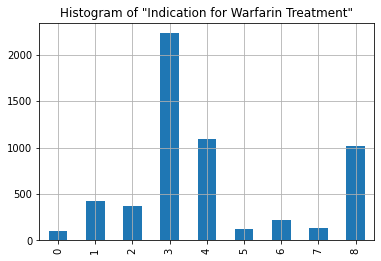

In [ ]:
hist = pd.DataFrame.from_dict(Counter(total_l),orient='index')
hist.plot(kind='bar',title='Histogram of "Indication for Warfarin Treatment"',legend =False,grid =True)

In [ ]:
### Visualize Age Histogram.

df = pd.read_csv(df_address)
I = df['Age']
I = I.fillna(-1)
I.replace(to_replace = '19-Oct', value = int(10), inplace=True)
I.replace(to_replace = '20 - 29', value = int(20), inplace=True)
I.replace(to_replace = '30 - 39', value = int(30), inplace=True)
I.replace(to_replace = '40 - 49', value = int(40), inplace=True)
I.replace(to_replace = '50 - 59', value = int(50), inplace=True)
I.replace(to_replace = '60 - 69', value = int(60), inplace=True)
I.replace(to_replace = '70 - 79', value = int(70), inplace=True)
I.replace(to_replace = '80 - 89', value = int(80), inplace=True)
I.replace(to_replace = '90+', value = int(90), inplace=True)
I = I.values.tolist()
I.sort()
I = [i for i in I if i != -1]

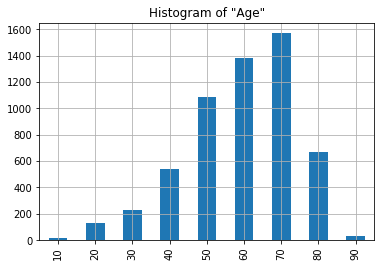

In [ ]:
hist = pd.DataFrame.from_dict(Counter(I),orient='index')
hist.plot(kind='bar',title='Histogram of "Age"',legend =False,grid =True, rot=90,)

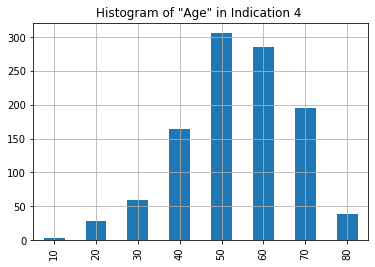

In [ ]:
### Visualize Ages for Indication 4 Histogram.

age_list = []
df = pd.read_csv(df_address)
df = df.fillna('-1')
#df.replace(to_replace = 'NA', value = np.nan, inplace=True)
#df = df[['Indication for Warfarin Treatment','Age']].dropna(axis=0)

for row in range(df.shape[0]):
  if '4' in df['Indication for Warfarin Treatment'][row]:
    age_list.append(df['Age'][row])
df_age_list = pd.DataFrame(age_list, columns=['Ages for Indication 4'])
df_age_list.replace(to_replace = '-1', value = int(-1), inplace=True)
df_age_list.replace(to_replace = '19-Oct', value = int(10), inplace=True)
df_age_list.replace(to_replace = '20 - 29', value = int(20), inplace=True)
df_age_list.replace(to_replace = '30 - 39', value = int(30), inplace=True)
df_age_list.replace(to_replace = '40 - 49', value = int(40), inplace=True)
df_age_list.replace(to_replace = '50 - 59', value = int(50), inplace=True)
df_age_list.replace(to_replace = '60 - 69', value = int(60), inplace=True)
df_age_list.replace(to_replace = '70 - 79', value = int(70), inplace=True)
df_age_list.replace(to_replace = '80 - 89', value = int(80), inplace=True)
df_age_list.replace(to_replace = '90+', value = int(90), inplace=True)
df_age_list = list(np.array(df_age_list).squeeze())
df_age_list.sort()
df_age_list = [i for i in df_age_list if i != -1]

hist = pd.DataFrame.from_dict(Counter(df_age_list), orient='index')
hist.plot(kind='bar',title='Histogram of "Age" in Indication 4 ',legend =False,grid =True)

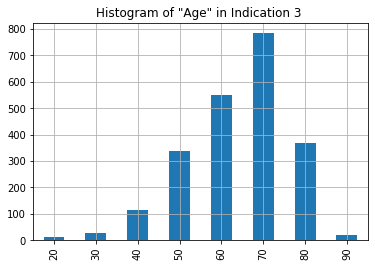

In [ ]:
### Visualize Ages for Indication 3 Histogram.

age_list = []
df = pd.read_csv(df_address)
df = df.fillna('-1')
#df.replace(to_replace = 'NA', value = np.nan, inplace=True)
#df = df[['Indication for Warfarin Treatment','Age']].dropna(axis=0)

for row in range(df.shape[0]):
  if '3' in df['Indication for Warfarin Treatment'][row]:
    age_list.append(df['Age'][row])
df_age_list = pd.DataFrame(age_list, columns=['Ages for Indication 4'])
df_age_list.replace(to_replace = '-1', value = int(-1), inplace=True)
df_age_list.replace(to_replace = '19-Oct', value = int(10), inplace=True)
df_age_list.replace(to_replace = '20 - 29', value = int(20), inplace=True)
df_age_list.replace(to_replace = '30 - 39', value = int(30), inplace=True)
df_age_list.replace(to_replace = '40 - 49', value = int(40), inplace=True)
df_age_list.replace(to_replace = '50 - 59', value = int(50), inplace=True)
df_age_list.replace(to_replace = '60 - 69', value = int(60), inplace=True)
df_age_list.replace(to_replace = '70 - 79', value = int(70), inplace=True)
df_age_list.replace(to_replace = '80 - 89', value = int(80), inplace=True)
df_age_list.replace(to_replace = '90+', value = int(90), inplace=True)
df_age_list = list(np.array(df_age_list).squeeze())
df_age_list.sort()
df_age_list = [i for i in df_age_list if i != -1]

hist = pd.DataFrame.from_dict(Counter(df_age_list), orient='index')
hist.plot(kind='bar',title='Histogram of "Age" in Indication 3 ',legend =False,grid =True)

**Models' Data**

In [ ]:
# Select specific age range and indication for treatment from the whole dataset ('4' & '50-59') & set NaNs to -1

from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

Indication = '4'
age = '50 - 59'

delete_rows_ind = []
delete_rows_age = []
df = pd.read_csv(df_address)
df = df.fillna('-1')
L = df['Indication for Warfarin Treatment'].str.split(';',expand=True)
L = L.fillna('-1')
L.replace(to_replace = '1 or 2', value = '0', inplace=True)
for row_L in range(L.shape[0]):
  if (Indication not in L[0][row_L]) and (Indication not in L[1][row_L]) and (Indication not in L[2][row_L]) and (Indication not in L[3][row_L]) and (Indication not in L[4][row_L]):
    delete_rows_ind.append(row_L)
    # L.dropna(axis=0)
I = df['Age']
I = I.fillna(-1)
for row_I in range(I.shape[0]):
  if age not in I[row_I]:
    delete_rows_age.append(row_I)
delete_rows = list(set(delete_rows_ind+delete_rows_age))
df.drop(delete_rows, inplace=True)
# print(df.head())
print('Number of patients with Indication '+Indication+' & between 50 to 59 years old is: ',df.shape[0])
# df = df[['INR on Reported Therapeutic Dose of Warfarin','Therapeutic Dose of Warfarin']].dropna(axis=0)

Number of patients with Indication 4 & between 50 to 59 years old is:  306


In [ ]:
from sklearn.model_selection import train_test_split
x = df_used.drop(['Therapeutic Dose of Warfarin'],axis=1)
y = df_used['Therapeutic Dose of Warfarin']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
y_test.shape

(123,)

In [ ]:
np.isnan(x_train).sum()

0

(0.0, 7.0)

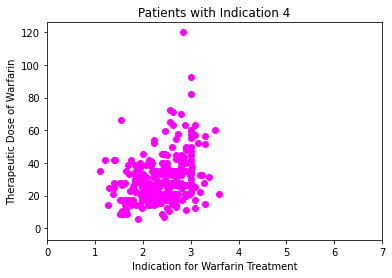

In [ ]:
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Indication for Warfarin Treatment')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients with Indication '+Indication)
plt.xlim(0,7)

(0.0, 7.0)

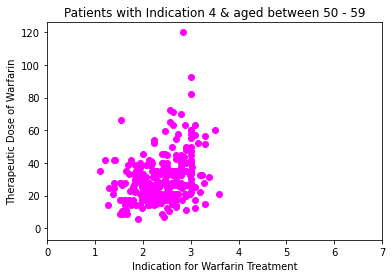

In [ ]:
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Indication for Warfarin Treatment')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients with Indication '+Indication+' & aged between 50 - 59')
plt.xlim(0,7)

**Data Preparation**

In [ ]:
# Select specific age range and indication for treatment from the whole dataset ('4' & '50-59')

from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

Indication = '4'
age = '50 - 59'

delete_rows = []
df = pd.read_csv(df_address)

for index, row in df.iterrows():
  if (age not in str(df['Age'][index])) or (Indication not in str(df['Indication for Warfarin Treatment'][index])):
    delete_rows.append(index)

df.drop(delete_rows, inplace=True)
# print(df.head())
print('Number of patients with Indication '+Indication+' & between 50 to 59 years old is: ',df.shape[0])
# df = df[['INR on Reported Therapeutic Dose of Warfarin','Therapeutic Dose of Warfarin']].dropna(axis=0)

Number of patients with Indication 4 & between 50 to 59 years old is:  306


In [ ]:
### Create dataset with specific comorbidities and conditions as columns.

import numpy as np
# df = pd.read_csv(df_address)
y = df['Therapeutic Dose of Warfarin']
df_race = df['Race (Reported)']
df_targetINR = df['Target INR']
df_height = df['Height (cm)']
df_weight = df['Weight (kg)']
df_gender = df['Gender']
df_smoking = df['Current Smoker']

l_diabetes,l_cancer,l_hypertension = [],[],[]
l_lovastatin, l_amiodarone = [], []
# for row_M in range(df['Comorbidities'].shape[0]):
for index, row in df.iterrows():
  if 'No Diabetes' in str(df['Comorbidities'][index]):
    l_diabetes.append(0)
  elif str(df['Comorbidities'][index]) == 'nan':
    l_diabetes.append(np.nan)
  elif 'Diabetes' in str(df['Comorbidities'][index]):
    l_diabetes.append(1)

  if 'No Cancer' in str(df['Comorbidities'][index]):
    l_cancer.append(0)
  elif str(df['Comorbidities'][index]) == 'nan':
    l_cancer.append(np.nan)
  elif 'Cancer' in str(df['Comorbidities'][index]):
    l_cancer.append(1)

  if 'No Hypertension' in str(df['Comorbidities'][index]):
    l_hypertension.append(0)
  elif str(df['Comorbidities'][index]) == 'nan':
    l_hypertension.append(np.nan)
  elif 'Hypertension' in str(df['Comorbidities'][index]):
    l_hypertension.append(1)

  if 'lovastatin' in str(df['Medications'][index]):
    l_lovastatin.append(1)
  elif str(df['Medications'][index]) == 'nan':
    l_lovastatin.append(np.nan)
  else:
    l_lovastatin.append(0)
  if 'Amiodarone' in str(df['Medications'][index]):
    l_amiodarone.append(1)
  elif str(df['Medications'][index]) == 'nan':
    l_amiodarone.append(np.nan)
  else:
    l_amiodarone.append(0)
d_diabetes = {'Diabetes': l_diabetes}
df_diabetes = pd.DataFrame(data=d_diabetes)
d_cancer = {'Cancer': l_cancer}
df_cancer = pd.DataFrame(data=d_cancer)
d_hypertension = {'Hypertention': l_hypertension}
df_hypertension = pd.DataFrame(data=d_hypertension)

d_lovastatin = {'Lovastatin': l_lovastatin}
df_lovastatin = pd.DataFrame(data=d_lovastatin)
d_amiodarone = {'Amiodarone': l_amiodarone}
df_amiodarone = pd.DataFrame(data=d_amiodarone)

# df_age = df['Age']
# df_dvt = '1'
# df_pe = '2'
# df_VR
# df_enzyme
df_used = pd.concat([y,df_race,df_targetINR,df_height,df_weight,df_gender,df_smoking,df_diabetes,df_cancer,df_hypertension,df_lovastatin,df_amiodarone], axis=1)
print(df_used.head())
df_used.to_csv('df_used.csv')

   Therapeutic Dose of Warfarin Race (Reported)  Target INR  Height (cm)  \
0                           NaN             NaN         NaN          NaN   
1                           NaN             NaN         NaN          NaN   
2                           NaN             NaN         NaN          NaN   
3                           NaN             NaN         NaN          NaN   
4                           NaN             NaN         NaN          NaN   

   Weight (kg) Gender  Current Smoker  Diabetes  Cancer  Hypertention  \
0          NaN    NaN             NaN       NaN     NaN           NaN   
1          NaN    NaN             NaN       NaN     NaN           NaN   
2          NaN    NaN             NaN       NaN     NaN           NaN   
3          NaN    NaN             NaN       NaN     NaN           NaN   
4          NaN    NaN             NaN       NaN     NaN           NaN   

   Lovastatin  Amiodarone  
0         NaN         NaN  
1         NaN         NaN  
2         NaN       

In [ ]:
x = df_used.drop(['Therapeutic Dose of Warfarin'],axis=1)

In [ ]:
### Guess Nans and replace headings

from sklearn.model_selection import train_test_split
df_used = df_used.rename({'Therapeutic Dose of Warfarin':'Dose', 'Race (Reported)': 'Race', 'Height (cm)': 'Height', 'Weight (kg)': 'Weight', 'Target INR': 'INR', 'Current Smoker': 'Smoker'}, axis=1)
# print(df_used.head())
df_used.fillna({'Race':"unknown",'Gender':"unknown",'Smoker':0,'Diabetes':0,'Cancer':0,'Hypertention':0,'Lovastatin':0,'Amiodarone':0}, inplace=True)
df_used.fillna({'Dose':df_used['Dose'].mean(),'INR':df_used['INR'].mean(),'Weight':df_used['Weight'].mean(),'Height':df_used['Height'].mean()}, inplace=True)
df_dummy = pd.get_dummies(df_used)
print(df_dummy.head())
# df_used.Race = pd.get_dummies(df_used.Race, prefix='Race')
# df_used.Gender = pd.get_dummies(df_used.Gender, prefix='Gender')
# df_used.Smoker = pd.get_dummies(df_used.Smoker, prefix='Smoker')
# df_used.Diabetes = pd.get_dummies(df_used.Diabetes, prefix='Diabetes')
# df_used.Cancer = pd.get_dummies(df_used.Cancer, prefix='Cancer')
# df_used.Hypertention = pd.get_dummies(df_used.Hypertention, prefix='Hypertention')
# df_used.Lovastatin = pd.get_dummies(df_used.Lovastatin, prefix='Lovastatin')
# df_used.Amiodarone = pd.get_dummies(df_used.Amiodarone, prefix='Amiodarone')
x = df_dummy.drop(['Dose'],axis=1)   # 'Therapeutic Dose of Warfarin'
y = df_dummy['Dose']
# print(x.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        Dose       INR     Height     Weight  Smoker  Diabetes  Cancer  \
0  30.121902  2.789474  163.29812  66.543813     0.0       0.0     0.0   
1  30.121902  2.789474  163.29812  66.543813     0.0       0.0     0.0   
2  30.121902  2.789474  163.29812  66.543813     0.0       0.0     0.0   
3  30.121902  2.789474  163.29812  66.543813     0.0       0.0     0.0   
4  30.121902  2.789474  163.29812  66.543813     0.0       0.0     0.0   

   Hypertention  Lovastatin  Amiodarone  ...  Race_Intermediate  \
0           0.0         0.0         0.0  ...                  0   
1           0.0         0.0         0.0  ...                  0   
2           0.0         0.0         0.0  ...                  0   
3           0.0         0.0         0.0  ...                  0   
4           0.0         0.0         0.0  ...                  0   

   Race_Japanese  Race_Korean  Race_Malay  Race_White  Race_other  \
0              0            0           0           0           0   
1             

In [ ]:
x.dropna(axis=0, how='any',subset=list(x.columns), inplace=True)
x

,INR,Height,Weight,Smoker,Diabetes,Cancer,Hypertention,Lovastatin,Amiodarone,Race_Black,...,Race_Hispanic,Race_Indian,Race_Intermediate,Race_Japanese,Race_Korean,Race_Malay,Race_White,Race_other,Gender_female,Gender_male


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# from sklearn import utils
# utils.multiclass.type_of_target(x_train_encoded)

# le = OneHotEncoder()
# x_train = np.array(le.fit_transform(x_train))
# x_test = np.array(le.fit_transform(x_test))
# one_hot_x_train = tf.keras.utils.to_categorical(x_train)
# one_hot_x_test = tf.keras.utils.to_categorical(x_test)

lab_enc = OrdinalEncoder()
x_train_encoded = lab_enc.fit_transform(x_train)
y_train_encoded = lab_enc.fit_transform(np.array(y_train).reshape(-1,1))
x_test_encoded = lab_enc.fit_transform(x_test)
y_test_encoded = lab_enc.fit_transform(np.array(y_test).reshape(-1,1))

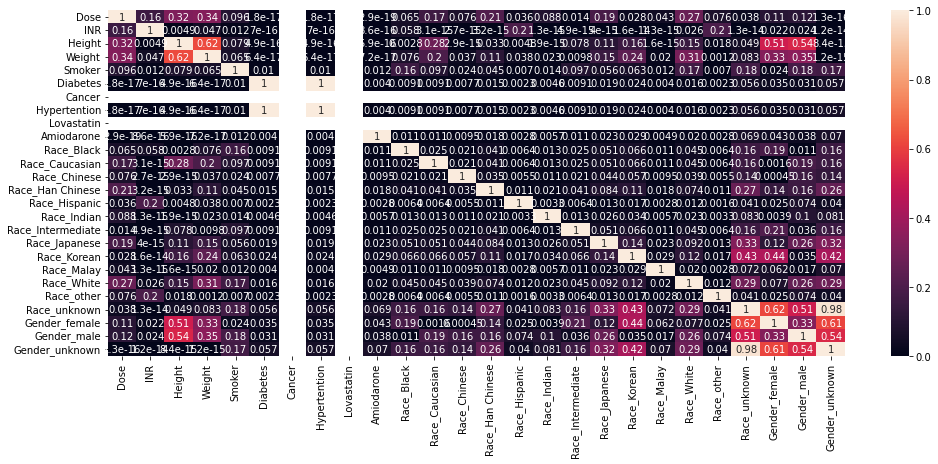

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(200,200))
CorrMatrix = abs(df_dummy.corr())

plt.figure(figsize=(16,8))
sns_plot = sns.heatmap(CorrMatrix, annot=True)
plt.subplots_adjust(left=0.2, bottom=0.3, right=1, top=0.9)
fig = sns_plot.get_figure()
# plt.savefig("Data_Correlation_Heatmap.png")
# print('Data_Correlation_Heatmap.png created!')
plt.show()

In [ ]:
False in list(df_dummy['Lovastatin'] == 0.0)

False

**DT for feature importance**

In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     |████████████████████████████████| 72 kB 723 kB/s 


In [ ]:
import sklearn
import dtreeviz

# clf = sklearn.tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, random_state=None)
clf_dt = sklearn.tree.DecisionTreeRegressor(criterion='squared_error', min_samples_split=10, random_state=None)
clf_dt.fit(x_train,y_train)

print("R-squared on train data:", clf_dt.score(x_train, y_train))
print("MSE on train data:", mean_squared_error(y_train, clf_dt.predict(x_train)))
print('*'*30)
print("R-squared on test data:", clf_dt.score(x_test, y_test))
print("MSE on test data:", mean_squared_error(y_test, clf_dt.predict(x_test)))
print('*'*30)
# acc_dt = accuracy_score(y_test, y_pred)
# print(acc_dt)
# rep_dt = classification_report(y_test, y_pred, output_dict=True)

fig = plt.figure(figsize=(25, 20),dpi=1000)
_ = sklearn.tree.plot_tree(clf_dt, filled=True, feature_names=list(x.head()))
fig.savefig(r"DT_plt.png")
plt.close()

viz = dtreeviz.trees.dtreeviz(clf_dt, x_train, y_train, target_name="target", feature_names=list(x.head()))
viz.save(r"DT_plt.svg")
plt.close()

R-squared on train data: 0.6274518472656341
MSE on train data: 35.89019154627461
******************************
R-squared on test data: -0.30401939995187277
MSE on test data: 166.20549726358297
******************************


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Testing different cut-offs on Doses**

Cutoff= 10
Cutoff= 20
Cutoff= 30
Cutoff= 40
Cutoff= 50
Cutoff= 60


Text(0, 0.5, 'score_test_cutoffplot_L')

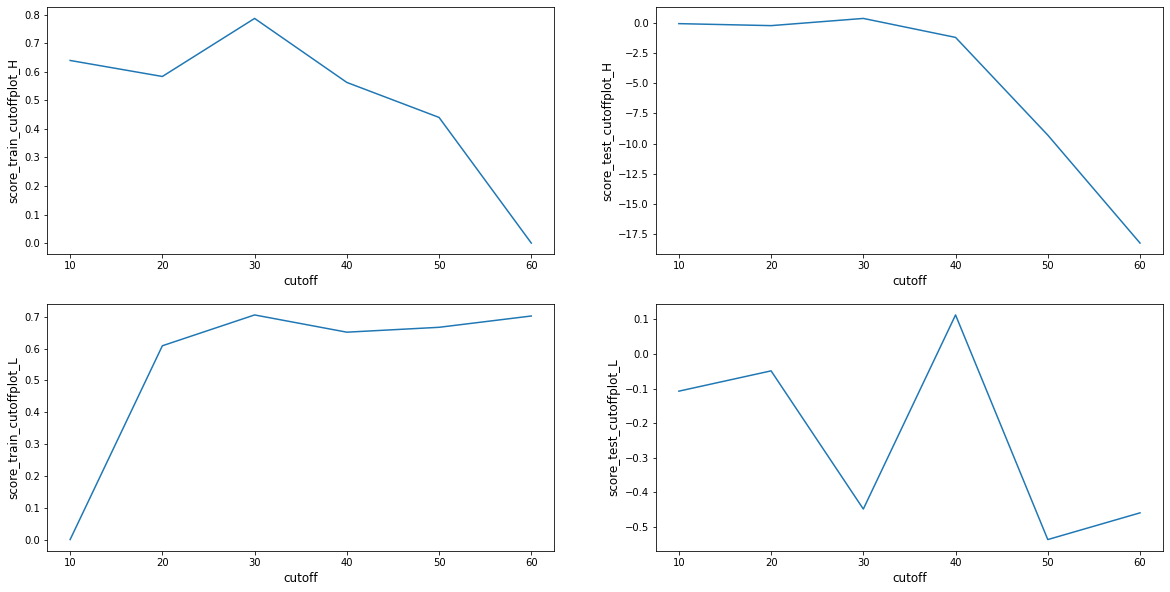

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

x_cutoffplot = list(range(10,70,10))
score_train_cutoffplot_H, score_test_cutoffplot_H, score_train_cutoffplot_L, score_test_cutoffplot_L = [], [], [], []
clf_dt = DecisionTreeRegressor(criterion='squared_error', min_samples_split=10, random_state=None)

for cutoff in range(10,70,10):
  print('Cutoff=',cutoff)
  df_cutoff_H = df_dummy[df_dummy['Dose']>cutoff]
  df_cutoff_L = df_dummy[df_dummy['Dose']<cutoff]
  x_H = df_cutoff_H.drop(['Dose'],axis=1)   # 'Therapeutic Dose of Warfarin'
  y_H = df_cutoff_H['Dose']
  x_L = df_cutoff_L.drop(['Dose'],axis=1)   # 'Therapeutic Dose of Warfarin'
  y_L = df_cutoff_L['Dose']
  x_train_H, x_test_H, y_train_H, y_test_H = train_test_split(x_H, y_H, test_size=0.2, random_state=42)
  x_train_L, x_test_L, y_train_L, y_test_L = train_test_split(x_L, y_L, test_size=0.2, random_state=42)
  clf_dt.fit(x_train_H,y_train_H)
  score_train_cutoffplot_H.append(clf_dt.score(x_train_H, y_train_H))
  score_test_cutoffplot_H.append(clf_dt.score(x_test_H, y_test_H))
  clf_dt.fit(x_train_L,y_train_L)
  score_train_cutoffplot_L.append(clf_dt.score(x_train_L, y_train_L))
  score_test_cutoffplot_L.append(clf_dt.score(x_test_L, y_test_L))  
fig, axs = plt.subplots(2,2, figsize=(20, 10))
axs[0,0].plot(x_cutoffplot, score_train_cutoffplot_H)
axs[0,0].set_xlabel('cutoff', fontsize=12)
axs[0,0].set_ylabel('score_train_cutoffplot_H', fontsize=12)
axs[0,1].plot(x_cutoffplot, score_test_cutoffplot_H)
axs[0,1].set_xlabel('cutoff', fontsize=12)
axs[0,1].set_ylabel('score_test_cutoffplot_H', fontsize=12)
axs[1,0].plot(x_cutoffplot, score_train_cutoffplot_L)
axs[1,0].set_xlabel('cutoff', fontsize=12)
axs[1,0].set_ylabel('score_train_cutoffplot_L', fontsize=12)
axs[1,1].plot(x_cutoffplot, score_test_cutoffplot_L)
axs[1,1].set_xlabel('cutoff', fontsize=12)
axs[1,1].set_ylabel('score_test_cutoffplot_L', fontsize=12)

In [ ]:
y.sort_values()

1569      5.81
843       7.00
1090      8.75
1302      8.75
1574      8.75
         ...  
5311     71.18
3656     72.50
2680     82.00
2442     92.50
1692    120.00
Name: Dose, Length: 612, dtype: float64

**SVR**

In [ ]:
clf_svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
clf_svr.fit(x_train,y_train)

y_pred_svr = clf_svr.predict(x_test)
score_svr = clf_svr.score(x_test, y_test)
print("R-squared:", score_svr)
print("MSE:", mean_squared_error(y_test, y_pred_svr))

R-squared: -0.00010055205536740885
MSE: 127.46912321556022


In [ ]:
plt.scatter(x_train, y_train, color = 'magenta')
plt.plot(x_train, clf_svr.predict(x_train), color = 'green')
plt.title('Support Vector Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Lasso**

In [ ]:
clf_lasso = Lasso(alpha=1.0, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf_lasso.fit(x_train,y_train)

y_pred_Lasso = clf_lasso.predict(x_test)
score_Lasso = clf_lasso.score(x_test, y_test)
print("R-squared:", score_Lasso)
print("MSE:", mean_squared_error(y_test, y_pred_Lasso))

R-squared: 0.11559958530540537
MSE: 112.72241096248959


In [ ]:
clf_lasso = Lasso(alpha=1.0, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf_lasso.fit(x_train,y_train)

y_pred_Lasso = clf_lasso.predict(x_test)
score_Lasso = clf_lasso.score(x_test, y_test)
print("R-squared:", score_Lasso)
print("MSE:", mean_squared_error(y_test, y_pred_Lasso))

R-squared: 0.0373544228184719
MSE: 255.80872517066837


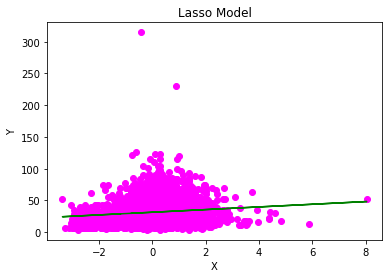

In [ ]:
plt.scatter(x_train, y_train, color = 'magenta')
plt.plot(x_train, clf_lasso.predict(x_train), color = 'green')
plt.title('Lasso Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**NN**

In [ ]:
from keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.utils import class_weight
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

# num_classes = 
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(units=16, activation="relu", use_bias=True))
# model.add(tf.keras.layers.Dense(units=32, activation="relu", use_bias=True))
# model.add(tf.keras.layers.Dense(units=64, activation="relu", use_bias=True))
# model.add(tf.keras.layers.Dense(units=32, activation="relu", use_bias=True))
model.add(tf.keras.layers.Dense(units=16, activation="relu", use_bias=True))
model.add(tf.keras.layers.Dense(units=8, activation="relu", use_bias=True))
model.add(tf.keras.layers.Dense(units=1, activation="exponential", use_bias=True))     #  selu elu exponential softsign LeakyReLU

msle = 'mean_squared_error'   # MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=0.01), metrics=[msle])     # Adam(learning_rate=0.01) SGD  RMSprop

# # class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(np.array(y_train)),y = np.array(y_train))
# # class_weights = dict(zip(np.unique(np.array(y_train)), class_weights))
# # class_weights = dict(enumerate(np.unique(np.array(y_train))))
history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_split=0.2)

print(model.evaluate(x_test,y_test))
# print(model.predict(x_test))

regr = MLPRegressor(hidden_layer_sizes=(128,64,32,16,8), activation='relu', random_state=1, max_iter=500).fit(x_train, y_train)
regr.predict(x_test[:2])
score = regr.score(x_test, y_test)
print('Score',score)

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.xlabel('Epoch number')
# plt.ylabel('Accuracy')
# plt.title('Training and validation accuracy')
# plt.savefig('Training and validation accuracy')
# # plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.xlabel('Epoch number')
# plt.ylabel('Loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.savefig('Training and validation loss')
# plt.show()

Epoch 1/50
4/4 [==============================] - 1s 102ms/step - loss: 2470692.2500 - mean_squared_error: 2470692.2500 - val_loss: 934.1322 - val_mean_squared_error: 934.1322
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 983.4220 - mean_squared_error: 983.4220 - val_loss: 934.1395 - val_mean_squared_error: 934.1395
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 983.4248 - mean_squared_error: 983.4248 - val_loss: 934.1395 - val_mean_squared_error: 934.1395
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 983.4248 - mean_squared_error: 983.4248 - val_loss: 934.1395 - val_mean_squared_error: 934.1395
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 983.4247 - mean_squared_error: 983.4247 - val_loss: 934.1395 - val_mean_squared_error: 934.1395
Epoch 6/50
4/4 [==============================] - 0s 25ms/step - loss: 983.4247 - mean_squared_error: 983.4247 - val_loss: 934.1395 - val_mean_squared_error

**SVC**

In [ ]:
clf_svc = SVC(C=1, kernel='poly', degree=6, gamma='scale', coef0=1,\
                            shrinking=True, probability=True, tol=1e-1, cache_size=200, class_weight=None, verbose=False,\
                            max_iter=-1, decision_function_shape='ovr', break_ties='False', random_state=42)
clf_svc.fit(x_train.astype('int'), y_train.astype('int'))
y_pred_svc = clf_svc.predict(x_test.astype('int'))
acc_svc = accuracy_score(y_test.astype('int'), y_pred_svc)
res_svc = classification_report(y_test.astype('int'), y_pred_svc, output_dict=True)
acc_svc

0.5609756097560976

In [ ]:
clf_svc = SVC(C=1, kernel='poly', degree=6, gamma='scale', coef0=1,\
                            shrinking=True, probability=True, tol=1e-1, cache_size=200, class_weight=None, verbose=False,\
                            max_iter=-1, decision_function_shape='ovr', break_ties='False', random_state=42)
clf_svc.fit(x_train_encoded, y_train_encoded.ravel())
y_pred_svc = clf_svc.predict(x_test_encoded)
acc_svc = accuracy_score(y_test_encoded.ravel(), y_pred_svc)
# res_svc = classification_report(y_test_encoded, y_pred_svc, output_dict=True)
acc_svc

0.008130081300813009

**Logistic Regression**

In [ ]:
clf_lr = LogisticRegression(penalty='none', solver='lbfgs', dual=False, tol=1e-2, C=1, fit_intercept=True,\
                                        max_iter=150, class_weight=None, random_state=42, multi_class='auto', warm_start=False, n_jobs=-1)
clf_lr.fit(x_train.astype('int'), y_train.astype('int'))
y_pred_lr = clf_lr.predict(x_test.astype('int'))
acc_lr = accuracy_score(y_test.astype('int'), y_pred_lr)
# res_lr = classification_report(y_test.astype('int'), y_pred_lr, output_dict=True)
acc_lr

0.5772357723577236

In [ ]:
clf_lr = LogisticRegression(penalty='none', solver='lbfgs', dual=False, tol=1e-2, C=1, fit_intercept=True,\
                                        max_iter=150, class_weight=None, random_state=42, multi_class='auto', warm_start=False, n_jobs=-1)
clf_lr.fit(x_train_encoded, y_train_encoded.ravel())
y_pred_lr = clf_lr.predict(x_test_encoded)
acc_lr = accuracy_score(y_test_encoded.ravel(), y_pred_lr)
# res_lr = classification_report(y_test_encoded, y_pred_lr, output_dict=True)
acc_lr

0.0

**Investigating Effect of Indication of Treatment and Other Drugs**

In [ ]:
# Select specific age range and indication for treatment from the whole dataset ('4' & '50-59')

from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

# Indication = '4'
age = '50 - 59'

delete_rows = []
df = pd.read_csv(df_address)

for index, row in df.iterrows():
  if (age not in str(df['Age'][index])): ### or (Indication not in str(df['Indication for Warfarin Treatment'][index]))
    delete_rows.append(index)

df.drop(delete_rows, inplace=True)
# print(df.head())
print('between 50 to 59 years old is: ',df.shape[0]) ### Number of patients with Indication '+Indication+' & 
# df = df[['INR on Reported Therapeutic Dose of Warfarin','Therapeutic Dose of Warfarin']].dropna(axis=0)

between 50 to 59 years old is:  1085


In [ ]:
df.head()

,PharmGKB Subject ID,PharmGKB Sample ID,Project Site,Gender,Race (Reported),Race (OMB),Ethnicity (Reported),Ethnicity (OMB),Age,Height (cm),...,VKORC1 genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,VKORC1 QC genotype: -4451 C>A (861); Chr16:31018002; rs17880887; A/C,CYP2C9 consensus,VKORC1 -1639 consensus,VKORC1 497 consensus,VKORC1 1173 consensus,VKORC1 1542 consensus,VKORC1 3730 consensus,VKORC1 2255 consensus,VKORC1 -4451 consensus
1,PA135312262,PA135312630,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,176.53,...,NaN,C/C,*1/*1,A/A,G/T,T/T,C/C,G/G,T/T,C/C
4,PA135312265,PA135312633,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,167.64,...,NaN,NaN,*1/*3,A/G,T/T,NaN,C/G,A/G,NaN,NaN
19,PA135312280,PA135312648,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,187.96,...,NaN,NaN,*1/*1,A/G,G/T,NaN,C/G,A/G,NaN,NaN
23,PA135312284,PA135312652,1,female,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,165.10,...,NaN,A/C,*1/*1,A/G,G/T,C/T,C/G,G/G,C/T,A/C
28,PA135312289,PA135312657,1,male,White,White,not Hispanic or Latino,not Hispanic or Latino,50 - 59,177.80,...,NaN,NaN,*1/*3,A/G,T/T,NaN,C/C,G/G,NaN,NaN


(0.0, 9.0)

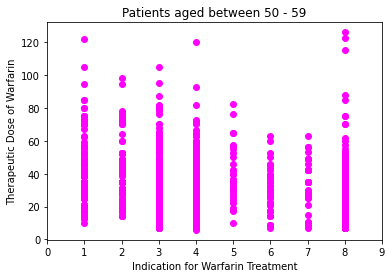

In [ ]:
l_x , l_y = [] , []
for index, row in df.iterrows():
  # if '1 or 2' in str(df['Indication for Warfarin Treatment'][index]):
  #   l_x.append(1)
  #   l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '1' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(1)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '2' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(2)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '3' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(3)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '4' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(4)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '5' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(5)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '6' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(6)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '7' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(7)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))
  if '8' in str(df['Indication for Warfarin Treatment'][index]):
    l_x.append(8)
    l_y.append(float(df['Therapeutic Dose of Warfarin'][index]))

x = l_x
y = l_y
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Indication for Warfarin Treatment')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients aged between 50 - 59')
plt.xlim(0,9)

(-1.0, 2.0)

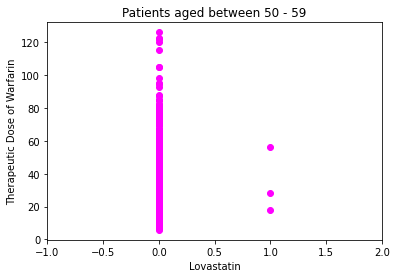

In [ ]:
l_lovastatin = []
for index, row in df.iterrows():
  if 'lovastatin' in str(df['Medications'][index]):
    l_lovastatin.append(1)
  elif str(df['Medications'][index]) == 'nan':
    l_lovastatin.append(np.nan)
  else:
    l_lovastatin.append(0)
d_lovastatin = {'Lovastatin': l_lovastatin}
df_lovastatin = pd.DataFrame(data=d_lovastatin)
df_lovastatin.dropna()

x = df_lovastatin
y = df['Therapeutic Dose of Warfarin']
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Lovastatin')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients aged between 50 - 59')
plt.xlim(-1,2)

(-1.0, 2.0)

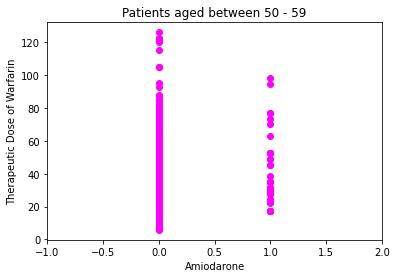

In [ ]:
l_amiodarone = []
for index, row in df.iterrows():
  if 'Amiodarone' in str(df['Medications'][index]):
    l_amiodarone.append(1)
  elif str(df['Medications'][index]) == 'nan':
    l_amiodarone.append(np.nan)
  else:
    l_amiodarone.append(0)
d_amiodarone = {'Amiodarone': l_amiodarone}
df_amiodarone = pd.DataFrame(data=d_amiodarone)
df_amiodarone.dropna()

x = df_amiodarone
y = df['Therapeutic Dose of Warfarin']
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Amiodarone')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients aged between 50 - 59')
plt.xlim(-1,2)

(-2.0, 2.0)

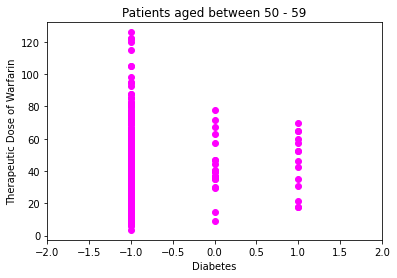

In [ ]:
l_diabetes = []
# df_y = pd.DataFrame(df['Therapeutic Dose of Warfarin'])
for index, row in df.iterrows():
  if 'No Diabetes' in str(df['Comorbidities'][index]):
    l_diabetes.append(0)
  elif 'Diabetes' in str(df['Comorbidities'][index]):
    l_diabetes.append(1)
  else:
    l_diabetes.append(-1)
    # df_y.drop(index,axis=0)
d_diabetes = {'Diabetes': l_diabetes}
df_diabetes = pd.DataFrame(data=d_diabetes)
# df_diabetes.dropna()

x = df_diabetes
y = df['Therapeutic Dose of Warfarin']
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Diabetes')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients aged between 50 - 59')
plt.xlim(-2,2)

(-2.0, 2.0)

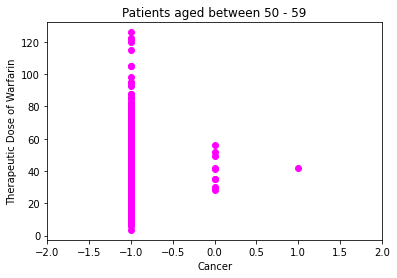

In [ ]:
l_cancer = []
for index, row in df.iterrows():
  if 'No Cancer' in str(df['Comorbidities'][index]):
    l_cancer.append(0)
  elif 'Cancer' in str(df['Comorbidities'][index]):
    l_cancer.append(1)
  else:
    l_cancer.append(-1)
d_cancer = {'Cancer': l_cancer}
df_cancer = pd.DataFrame(data=d_cancer)

x = df_cancer
y = df['Therapeutic Dose of Warfarin']
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Cancer')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients aged between 50 - 59')
plt.xlim(-2,2)

(-2.0, 2.0)

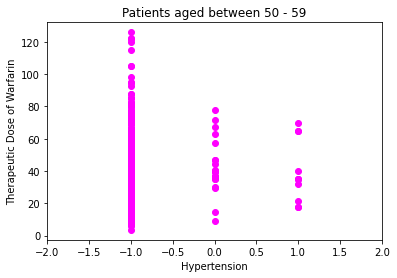

In [ ]:
l_hypertension = []
for index, row in df.iterrows():
  if 'No Hypertension' in str(df['Comorbidities'][index]):
    l_hypertension.append(0)
  elif 'Hypertension' in str(df['Comorbidities'][index]):
    l_hypertension.append(1)
  else:
    l_hypertension.append(-1)
d_hypertension = {'Hypertention': l_hypertension}
df_hypertension = pd.DataFrame(data=d_hypertension)

x = df_hypertension
y = df['Therapeutic Dose of Warfarin']
plt.scatter(x, y, color = 'magenta')
plt.xlabel('Hypertension')
plt.ylabel('Therapeutic Dose of Warfarin')
plt.title('Patients aged between 50 - 59')
plt.xlim(-2,2)

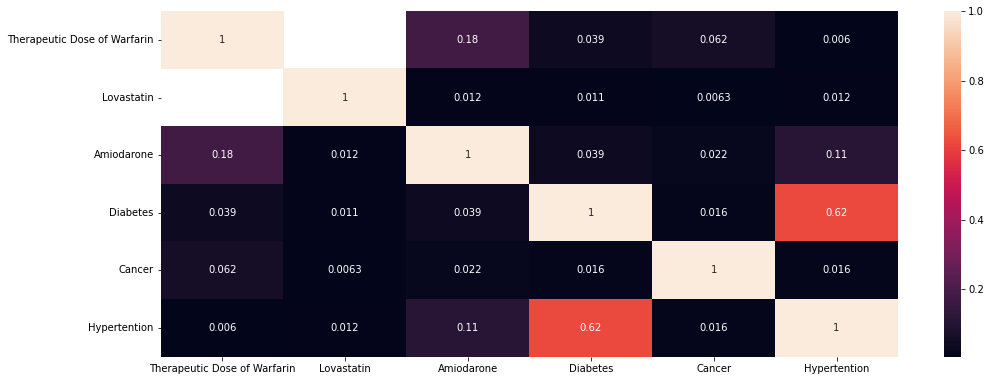

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.concat([pd.DataFrame(df['Therapeutic Dose of Warfarin']), df_lovastatin, df_amiodarone, df_diabetes, df_cancer, df_hypertension], axis=1)

# plt.figure(figsize=(200,200))
CorrMatrix = abs(df_corr.corr())

plt.figure(figsize=(16,8))
sns_plot = sns.heatmap(CorrMatrix, annot=True)
plt.subplots_adjust(left=0.2, bottom=0.3, right=1, top=0.9)
fig = sns_plot.get_figure()
# plt.savefig("Data_Correlation_Heatmap.png")
# print('Data_Correlation_Heatmap.png created!')
plt.show()

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LogisticRegression
from keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.utils import class_weight
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

score_train_P, score_test_P, score_train_N, score_test_N = [], [], [], []
# clf_svc = SVC(C=1, kernel='poly', degree=6, gamma='scale', coef0=1,\
#                             shrinking=True, probability=True, tol=1e-1, cache_size=200, class_weight=None, verbose=False,\
#                             max_iter=-1, decision_function_shape='ovr', break_ties='False', random_state=42)
clf_svr = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
clf_lr = LogisticRegression(penalty='none', solver='lbfgs', dual=False, tol=1e-2, C=1, fit_intercept=True,\
                                        max_iter=150, class_weight=None, random_state=42, multi_class='auto', warm_start=False, n_jobs=-1)
clf_dt = DecisionTreeRegressor(criterion='squared_error', min_samples_split=10, random_state=None)
clf_lasso = Lasso(alpha=1.0, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001,\
                  warm_start=False, positive=False, random_state=None, selection='cyclic')

df_Positive = df_dummy[df_dummy['Dose']==1]
df_Negative = df_dummy[df_dummy['Dose']==0]
x_P = df_P.drop(['Dose'],axis=1)   # 'Therapeutic Dose of Warfarin'
y_P = df_P['Dose']
x_N = df_N.drop(['Dose'],axis=1)   # 'Therapeutic Dose of Warfarin'
y_N = df_N['Dose']
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(x_P, y_P, test_size=0.2, random_state=42)
x_train_N, x_test_N, y_train_N, y_test_N = train_test_split(x_N, y_N, test_size=0.2, random_state=42)
clf_dt.fit(x_train_P,y_train_P)
# y_pred_lr = clf_lr.predict(x_test_encoded)
# acc_lr = accuracy_score(y_test_encoded.ravel(), y_pred_lr)
# print("R-squared:", clf_lasso.score(x_test, y_test))
# print("MSE:", mean_squared_error(y_test, y_pred_Lasso))
score_train_P.append(clf_dt.score(x_train_P, y_train_P))
score_test_P.append(clf_dt.score(x_test_P, y_test_P))
clf_dt.fit(x_train_N,y_train_N)
score_train_N.append(clf_dt.score(x_train_N, y_train_N))
score_test_N.append(clf_dt.score(x_test_N, y_test_N))  

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation="relu", use_bias=True))
model.add(tf.keras.layers.Dense(units=8, activation="relu", use_bias=True))
model.add(tf.keras.layers.Dense(units=1, activation="exponential", use_bias=True))     #  selu elu exponential softsign LeakyReLU
msle = 'mean_squared_error'   # MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=0.01), metrics=[msle])     # Adam(learning_rate=0.01) SGD  RMSprop
history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_split=0.2)
print(model.evaluate(x_test,y_test))
# regr = MLPRegressor(hidden_layer_sizes=(128,64,32,16,8), activation='relu', random_state=1, max_iter=500).fit(x_train, y_train)
# regr.predict(x_test[:2])
# score = regr.score(x_test, y_test)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = pd.concat([pd.DataFrame(df['Therapeutic Dose of Warfarin']), df_lovastatin, df_amiodarone, df_diabetes, df_cancer, df_hypertension], axis=1)

# plt.figure(figsize=(200,200))
CorrMatrix = abs(df_corr.corr())

plt.figure(figsize=(16,8))
sns_plot = sns.heatmap(CorrMatrix, annot=True)
plt.subplots_adjust(left=0.2, bottom=0.3, right=1, top=0.9)
fig = sns_plot.get_figure()
# plt.savefig("Data_Correlation_Heatmap.png")
# print('Data_Correlation_Heatmap.png created!')
plt.show()